# CSE 311A: Introduction to Intelligent Agents Using Science Fiction 

## Programming Assignment 2
### Jeremy Goldstein

In [368]:
import random
import matplotlib.pyplot as plt

In [425]:
def playGeneration():
    payOffs = [0 for i in range(0, n)] # Reset payoffs
    random.shuffle(generationList[len(generationList) - 1]) #randomized for later evolution steps 
    currGeneration = generationList[len(generationList) - 1]
    
    # Complete Games
    for player1Index in range (0, len(currGeneration)): 
        for player2Index in range (player1Index + 1, len(currGeneration)):
            player1 = currGeneration[player1Index]
            player2 = currGeneration[player2Index]
            (player1Res, player2Res) = determinePayoff(player1, player2, 5) # Repeated game m times
            payOffs[player1Index] += player1Res
            payOffs[player2Index] += player2Res
    
    # Compute Results
    for playerType in typesOfPlayers: # Update typesOfPlayers if a playerType has been eliminated
        if playerType not in currGeneration:
            typesOfPlayers.remove(playerType)
            percentageList[playerType].append(0)
            payoffTotalList[playerType].append(0)
            payoffRatesList[playerType].append(0)
        
    outputBase = "Gen " + str(len(generationList) - 1) + ": " + " "*3
    output1 = outputBase
    output2 = outputBase + "Total: " + str(sum(payOffs)) + " "*3
    output3 = outputBase
    for playerType in typesOfPlayers:
        tempTally = 0
        for playerIndex in range(0, len(currGeneration)):
            if currGeneration[playerIndex] == playerType:
                tempTally += payOffs[playerIndex]
        output1 += playerType + ": " + str(playerCounts[playerType] * 100 // n) + "%" + " "*3
        output2 += playerType + ": " + str(tempTally) +  " "*3
        output3 += playerType + ": " + str(tempTally// max(1, playerCounts[playerType])) + " "*3
        
        percentageList[playerType].append(playerCounts[playerType] * 100 // n)
        payoffTotalList[playerType].append(tempTally)
        payoffRatesList[playerType].append(tempTally// max(1, playerCounts[playerType]))
    payoffTotalList["TOTAL"].append(sum(payOffs))
    
    #print (output1)
    #print (output2)
    #print (output3)

    # Remove bottom p%, replicate top p%
    numberToModify = p * n // 100
    for x in range(0, numberToModify): 
        worstPayoffIndex = payOffs.index(min(payOffs))       
        bestPayoffIndex = payOffs.index(max(payOffs)) 
                
        worstPerformer = currGeneration[worstPayoffIndex]
        bestPerformer = currGeneration[bestPayoffIndex]
        
        playerCounts[worstPerformer] = playerCounts[worstPerformer] - 1
        playerCounts[bestPerformer] = playerCounts[bestPerformer] + 1
        
        currGeneration = currGeneration[0:worstPayoffIndex] + currGeneration[worstPayoffIndex + 1:]
        currGeneration = currGeneration[0:bestPayoffIndex] + currGeneration[bestPayoffIndex + 1:]
        payOffs = payOffs[0:worstPayoffIndex] + payOffs[worstPayoffIndex + 1:] 
        payOffs = payOffs[0:bestPayoffIndex] + payOffs[bestPayoffIndex + 1:]
    
    
    nextGeneration = []    
    for playerType in typesOfPlayers:
            for i in range(0, playerCounts[playerType]):
                nextGeneration.append(playerType)
    generationList.append(nextGeneration)
        

In [397]:
def determinePayoff(player1, player2, m):
    player1Payoff = 0
    player2Payoff = 0
    
    player1Decisions = [playerInitialStrategies[player1]]
    player2Decisions = [playerInitialStrategies[player2]]
    
    for game in range(0, m):
        # Determine outcomes
        player1Choice = player1Decisions[game] 
        player2Choice= player2Decisions[game]
        if player1Choice == player2Choice:
            if player1Choice == "COOP":
                player1Payoff += 3
                player2Payoff += 3
            else:
                player1Payoff += 1
                player2Payoff += 1
        else:
            if player1Choice == "COOP":
                player2Payoff += 5
            else:
                player1Payoff += 5
        
        # Determine next choices
        if player1 == "AC":
            player1Decisions.append("COOP")
        elif player1 == "AD":
            player1Decisions.append("DEFECT")
        elif player1 == "T4T":
            player1Decisions.append(player2Choice)
        else:
            if "DEFECT" in player2Decisions:
                player1Decisions.append("DEFECT")
            else:
                player1Decisions.append("COOP")
        
        if player2 == "AC":
            player2Decisions.append("COOP")
        elif player2 == "AD":
            player2Decisions.append("DEFECT")
        elif player2 == "T4T":
            player2Decisions.append(player1Choice)
        else:
            if "DEFECT" in player1Decisions:
                player2Decisions.append("DEFECT")
            else:
                player2Decisions.append("COOP")
                
    return (player1Payoff, player2Payoff)

In [423]:
def graph():
    
    # Graph 1: Percentage of Pop. by Type
    fig, ax = plt.subplots()

    for playerType in percentageList:
        ax.plot(percentageList[playerType])

    plt.xlim(0, k, 1)
    ax.set(xlabel='Generation #',
           ylabel='% of Total Pop',
           title='Percentage of Pop. by Type')
    ax.grid()
    plt.legend([playerType for playerType in percentageList])
    plt.show()
    
    # Graph 2: Total payoff by type
    fig, ax = plt.subplots()

    for payoff in payoffTotalList:
        ax.plot(payoffTotalList[payoff])

    plt.xlim(0, k, 1)
    ax.set(xlabel='Generation #',
           ylabel='Total Payoff by Type',
           title='Total Payoff by Type')
    ax.grid()
    plt.legend([payoff for payoff in payoffTotalList])
    plt.show()
    
    # Graph 3: Avg. payoff by type
    fig, ax = plt.subplots()

    for rate in payoffRatesList:
        ax.plot(payoffRatesList[rate], linewidth=max(1, random.random() * 4))

    plt.xlim(0, k, 1)
    ax.set(xlabel='Generation #',
           ylabel='Avg. Payoff by Type',
           title='Avg. Payoff by Type')
    ax.grid()
    plt.legend([rate for rate in payoffRatesList])
    plt.show()

Gen 1:    T4T: 25%   G: 25%   AC: 25%   AD: 25%   
Gen 1:    Total: 118125   T4T: 30250   G: 30250   AC: 27750   AD: 29875   
Gen 1:    T4T: 1210   G: 1210   AC: 1110   AD: 1195   
Gen 2:    T4T: 27%   G: 28%   AC: 20%   AD: 25%   
Gen 2:    Total: 116625   T4T: 32670   G: 33880   AC: 22200   AD: 27875   
Gen 2:    T4T: 1210   G: 1210   AC: 1110   AD: 1115   
Gen 3:    T4T: 28%   G: 32%   AC: 15%   AD: 25%   
Gen 3:    Total: 115125   T4T: 33880   G: 38720   AC: 16650   AD: 25875   
Gen 3:    T4T: 1210   G: 1210   AC: 1110   AD: 1035   
Gen 4:    T4T: 28%   G: 37%   AC: 15%   AD: 20%   
Gen 4:    Total: 121100   T4T: 35420   G: 46805   AC: 17775   AD: 21100   
Gen 4:    T4T: 1265   G: 1265   AC: 1185   AD: 1055   
Gen 5:    T4T: 30%   G: 40%   AC: 15%   AD: 15%   
Gen 5:    Total: 127425   T4T: 39600   G: 52800   AC: 18900   AD: 16125   
Gen 5:    T4T: 1320   G: 1320   AC: 1260   AD: 1075   
Gen 6:    T4T: 33%   G: 42%   AC: 15%   AD: 10%   
Gen 6:    Total: 134100   T4T: 45375   G: 57

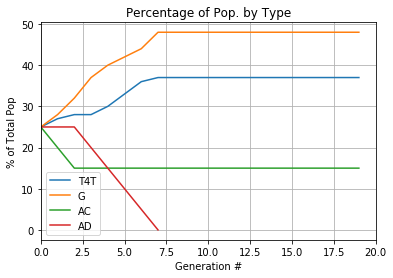

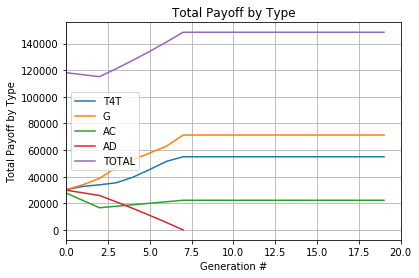

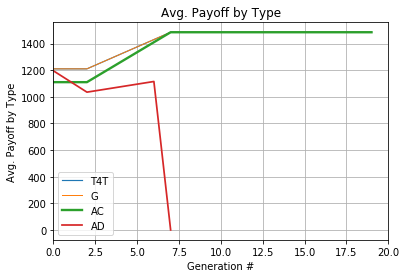

In [388]:
playerInitialStrategies = {"T4T": "COOP", "G": "COOP", "AC": "COOP", "AD": "DEFECT"}

# Q1
# Initialize variables

n = 100 #NOTE: n must be multiple of typesOfPlayers
m = 5
p = 5
k = 20

typesOfPlayers = ["T4T", "G", "AC", "AD"]
playerCounts = {}
initialGeneration = []

percentageList = {"T4T": [], "G": [], "AC": [], "AD": []}
payoffTotalList = {"T4T": [], "G": [], "AC": [], "AD": [], "TOTAL": []}
payoffRatesList = {"T4T": [], "G": [], "AC": [], "AD": []}

for playerType in typesOfPlayers:
    playerCounts[playerType] = n//len(typesOfPlayers)
    for i in range (0, playerCounts[playerType]):
        initialGeneration.append(playerType)
        
generationList = [[],initialGeneration]
payOffs = [0 for i in range(0, n)]

for i in range(0, k): # Run experiment for k generations
    playGeneration()
graph()

Gen 1:    T4T: 33%   G: 33%   AD: 33%   
Gen 1:    Total: 97944   T4T: 36531   G: 36531   AD: 24882   
Gen 1:    T4T: 1107   G: 1107   AD: 754   
Gen 2:    T4T: 37%   G: 33%   AD: 29%   
Gen 2:    Total: 102900   T4T: 42587   G: 37983   AD: 22330   
Gen 2:    T4T: 1151   G: 1151   AD: 770   
Gen 3:    T4T: 39%   G: 35%   AD: 25%   
Gen 3:    Total: 108080   T4T: 46605   G: 41825   AD: 19650   
Gen 3:    T4T: 1195   G: 1195   AD: 786   
Gen 4:    T4T: 41%   G: 37%   AD: 21%   
Gen 4:    Total: 113484   T4T: 50799   G: 45843   AD: 16842   
Gen 4:    T4T: 1239   G: 1239   AD: 802   
Gen 5:    T4T: 45%   G: 37%   AD: 17%   
Gen 5:    Total: 119112   T4T: 57735   G: 47471   AD: 13906   
Gen 5:    T4T: 1283   G: 1283   AD: 818   
Gen 6:    T4T: 46%   G: 40%   AD: 13%   
Gen 6:    Total: 124964   T4T: 61042   G: 53080   AD: 10842   
Gen 6:    T4T: 1327   G: 1327   AD: 834   
Gen 7:    T4T: 46%   G: 44%   AD: 9%   
Gen 7:    Total: 131040   T4T: 63066   G: 60324   AD: 7650   
Gen 7:    T4T: 13

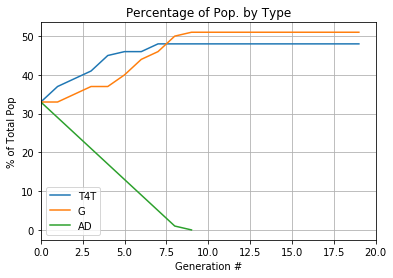

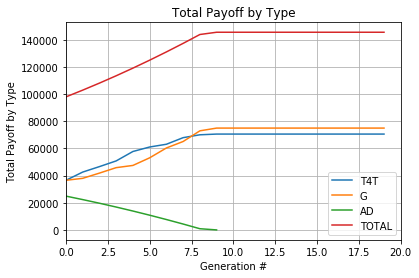

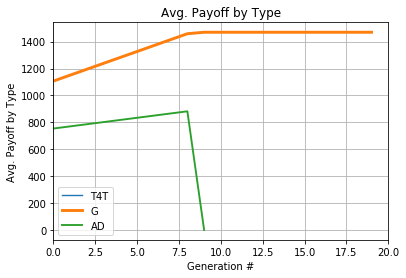

In [389]:
# Q2.1 Scenario: 'Just' world, no AC players

# Reinitialize variables
n = 99

typesOfPlayers = ["T4T", "G",  "AD"]
playerCounts = {}
initialGeneration = []

percentageList = {"T4T": [], "G": [],  "AD": []}
payoffTotalList = {"T4T": [], "G": [],   "AD": [], "TOTAL": []}
payoffRatesList = {"T4T": [], "G": [],  "AD": []}

for playerType in typesOfPlayers:
    playerCounts[playerType] = n//len(typesOfPlayers) 
    for i in range (0, playerCounts[playerType]):
        initialGeneration.append(playerType)

generationList = [[],initialGeneration]
payOffs = [0 for i in range(0, n)]

for i in range(0, k): # Run experiment for k generations
    playGeneration()
graph()

Gen 1:    T4T: 5%   G: 5%   AC: 5%   AD: 85%   
Gen 1:    Total: 60525   T4T: 2750   G: 2750   AC: 1050   AD: 53975   
Gen 1:    T4T: 550   G: 550   AC: 210   AD: 635   
Gen 2:    T4T: 5%   G: 5%   AD: 90%   
Gen 2:    Total: 53100   T4T: 2475   G: 2475   AD: 48150   
Gen 2:    T4T: 495   G: 495   AD: 535   
Gen 3:    T4T: 2%   G: 3%   AD: 95%   
Gen 3:    Total: 51125   T4T: 880   G: 1320   AD: 48925   
Gen 3:    T4T: 440   G: 440   AD: 515   
Gen 4:    G: 0%   AD: 100%   
Gen 4:    Total: 49500   G: 0   AD: 49500   
Gen 4:    G: 0   AD: 495   
Gen 5:    AD: 100%   
Gen 5:    Total: 49500   AD: 49500   
Gen 5:    AD: 495   
Gen 6:    AD: 100%   
Gen 6:    Total: 49500   AD: 49500   
Gen 6:    AD: 495   
Gen 7:    AD: 100%   
Gen 7:    Total: 49500   AD: 49500   
Gen 7:    AD: 495   
Gen 8:    AD: 100%   
Gen 8:    Total: 49500   AD: 49500   
Gen 8:    AD: 495   
Gen 9:    AD: 100%   
Gen 9:    Total: 49500   AD: 49500   
Gen 9:    AD: 495   
Gen 10:    AD: 100%   
Gen 10:    Total: 49

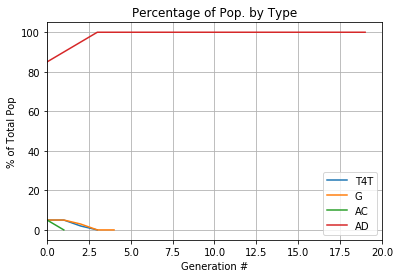

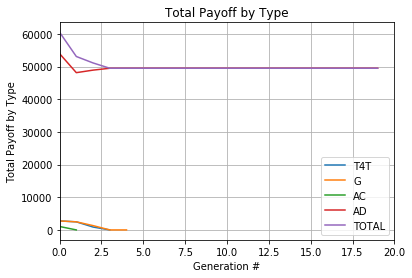

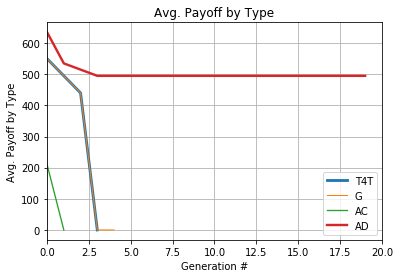

In [413]:
# Q2.2 Scenario: Lone survivors

# Reinitialize variables
n = 100

typesOfPlayers = ["T4T", "G", "AC", "AD"]
playerCounts = {}
initialGeneration = []

percentageList = {"T4T": [], "G": [], "AC": [], "AD": []}
payoffTotalList = {"T4T": [], "G": [],  "AC": [], "AD": [], "TOTAL": []}
payoffRatesList = {"T4T": [], "G": [], "AC": [], "AD": []}

playerCounts["T4T"] = 5
playerCounts["G"] = 5
playerCounts["AC"] = 5
playerCounts["AD"] = 85

for playerType in typesOfPlayers:
    for i in range(0, playerCounts[playerType]):
        initialGeneration.append(playerType)


generationList = [[],initialGeneration]
payOffs = [0 for i in range(0, n)]

for i in range(0, k): # Run experiment for k generations
    playGeneration()
graph()

Gen 1:    T4T: 98%   G: 1%   AC: 1%   
Gen 1:    Total: 148500   T4T: 145530   G: 1485   AC: 1485   
Gen 1:    T4T: 1485   G: 1485   AC: 1485   
Gen 2:    T4T: 98%   G: 1%   AC: 1%   
Gen 2:    Total: 148500   T4T: 145530   G: 1485   AC: 1485   
Gen 2:    T4T: 1485   G: 1485   AC: 1485   
Gen 3:    T4T: 98%   G: 1%   AC: 1%   
Gen 3:    Total: 148500   T4T: 145530   G: 1485   AC: 1485   
Gen 3:    T4T: 1485   G: 1485   AC: 1485   
Gen 4:    T4T: 98%   G: 1%   AC: 1%   
Gen 4:    Total: 148500   T4T: 145530   G: 1485   AC: 1485   
Gen 4:    T4T: 1485   G: 1485   AC: 1485   
Gen 5:    T4T: 98%   G: 1%   AC: 1%   
Gen 5:    Total: 148500   T4T: 145530   G: 1485   AC: 1485   
Gen 5:    T4T: 1485   G: 1485   AC: 1485   
Gen 6:    T4T: 98%   G: 1%   AC: 1%   
Gen 6:    Total: 148500   T4T: 145530   G: 1485   AC: 1485   
Gen 6:    T4T: 1485   G: 1485   AC: 1485   
Gen 7:    T4T: 98%   G: 1%   AC: 1%   
Gen 7:    Total: 148500   T4T: 145530   G: 1485   AC: 1485   
Gen 7:    T4T: 1485   G: 1485

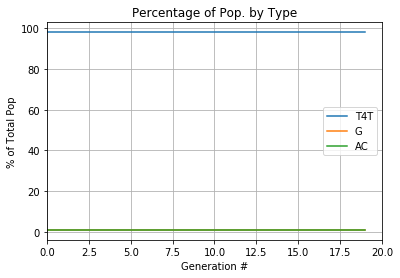

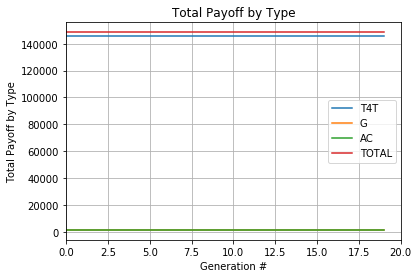

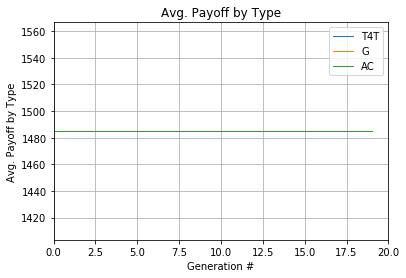

In [422]:
# Q2.3 Reinitialize variables
# Scenario: Proposed scenario in writeup
n = 100

typesOfPlayers = ["T4T", "G",  "AC"]
playerCounts = {}
initialGeneration = []

percentageList = {"T4T": [], "G": [],  "AC": []}
payoffTotalList = {"T4T": [], "G": [],   "AC": [], "TOTAL": []}
payoffRatesList = {"T4T": [], "G": [],  "AC": []}

playerCounts["T4T"] = 98
playerCounts["G"] = 1
playerCounts["AC"] = 1

for playerType in typesOfPlayers:
    for i in range(0, playerCounts[playerType]):
        initialGeneration.append(playerType)

generationList = [[],initialGeneration]
payOffs = [0 for i in range(0, n)]

for i in range(0, k): # Run experiment for k generations
    playGeneration()
graph()

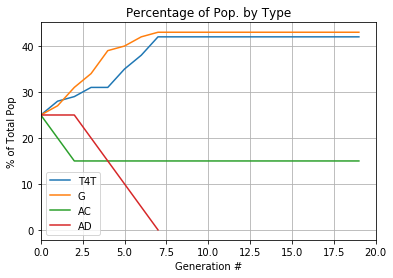

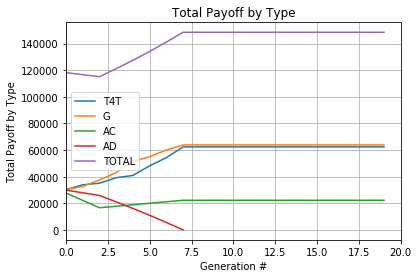

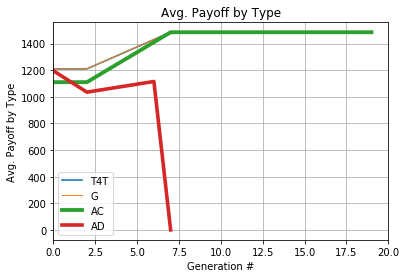

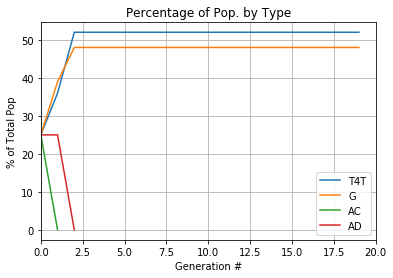

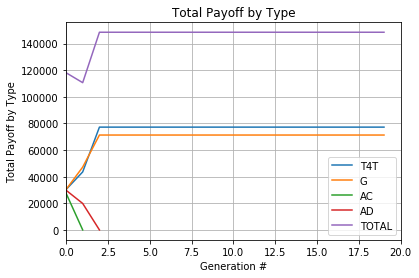

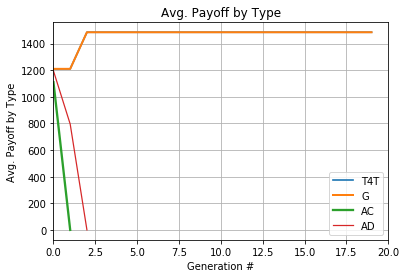

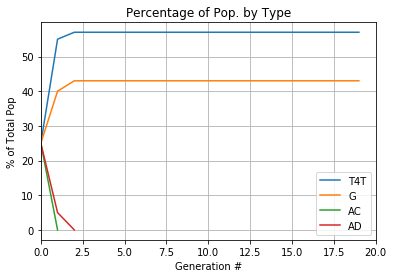

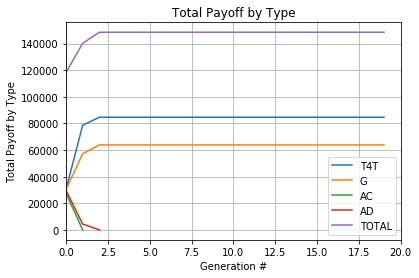

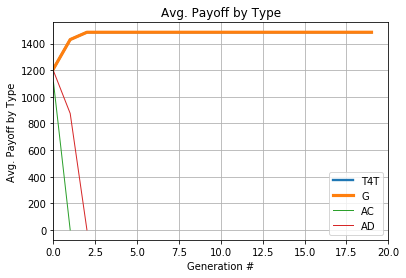

In [432]:
# Q3
# Initialize variables
p = 5
for pPrime in range(p, 65, 20):          
    n = 100
    m = 5
    p = pPrime
    k = 20

    typesOfPlayers = ["T4T", "G", "AC", "AD"]
    playerCounts = {}
    initialGeneration = []

    percentageList = {"T4T": [], "G": [], "AC": [], "AD": []}
    payoffTotalList = {"T4T": [], "G": [], "AC": [], "AD": [], "TOTAL": []}
    payoffRatesList = {"T4T": [], "G": [], "AC": [], "AD": []}

    for playerType in typesOfPlayers:
        playerCounts[playerType] = n//len(typesOfPlayers)
        for i in range (0, playerCounts[playerType]):
            initialGeneration.append(playerType)

    generationList = [[],initialGeneration]
    payOffs = [0 for i in range(0, n)]

    for i in range(0, k): # Run experiment for k generations
        playGeneration()
    graph()

Gen 1:    T4T: 25%   G: 25%   AC: 25%   AD: 25%   
Gen 1:    Total: 118125   T4T: 30250   G: 30250   AC: 27750   AD: 29875   
Gen 1:    T4T: 1210   G: 1210   AC: 1110   AD: 1195   
Gen 2:    T4T: 28%   G: 27%   AC: 20%   AD: 25%   
Gen 2:    Total: 116625   T4T: 33880   G: 32670   AC: 22200   AD: 27875   
Gen 2:    T4T: 1210   G: 1210   AC: 1110   AD: 1115   
Gen 3:    T4T: 29%   G: 31%   AC: 15%   AD: 25%   
Gen 3:    Total: 115125   T4T: 35090   G: 37510   AC: 16650   AD: 25875   
Gen 3:    T4T: 1210   G: 1210   AC: 1110   AD: 1035   
Gen 4:    T4T: 32%   G: 33%   AC: 15%   AD: 20%   
Gen 4:    Total: 121100   T4T: 40480   G: 41745   AC: 17775   AD: 21100   
Gen 4:    T4T: 1265   G: 1265   AC: 1185   AD: 1055   
Gen 5:    T4T: 33%   G: 37%   AC: 15%   AD: 15%   
Gen 5:    Total: 127425   T4T: 43560   G: 48840   AC: 18900   AD: 16125   
Gen 5:    T4T: 1320   G: 1320   AC: 1260   AD: 1075   
Gen 6:    T4T: 35%   G: 40%   AC: 15%   AD: 10%   
Gen 6:    Total: 134100   T4T: 48125   G: 55

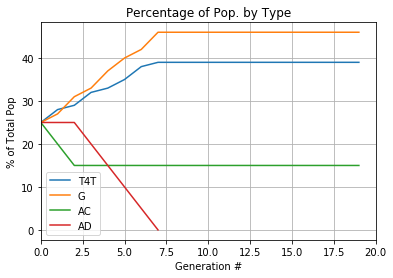

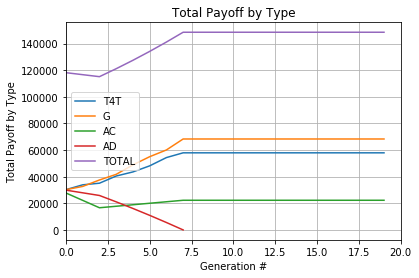

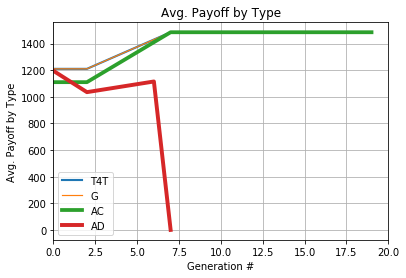

In [424]:
# Q4 Extra Credit 
# Scenario: Longer game sessions 
n = 100
m = 500
p = 5

typesOfPlayers = ["T4T", "G", "AC", "AD"]
playerCounts = {}
initialGeneration = []

percentageList = {"T4T": [], "G": [], "AC": [], "AD": []}
payoffTotalList = {"T4T": [], "G": [],  "AC": [], "AD": [], "TOTAL": []}
payoffRatesList = {"T4T": [], "G": [], "AC": [], "AD": []}

for playerType in typesOfPlayers:
    playerCounts[playerType] = n//len(typesOfPlayers)
    for i in range (0, playerCounts[playerType]):
        initialGeneration.append(playerType)

generationList = [[],initialGeneration]
payOffs = [0 for i in range(0, n)]

for i in range(0, k): # Run experiment for k generations
    playGeneration()
graph()

# Programming Assignment 2 Questions

## Question 1

### What trends do you observe in your simulation? 
The overall trend when n = 100, m = 5, p = 5, and k = 20 is that: AD becomes extinct; T4T and G become the dominant strategies; and AC declines from its initial point. What likely occurs in this environment is that initially the most influential matchup is AD vs. AC: expectedly, AD reaps the most reward from AC, causing AC to drop and AD to experience an initial increase, respectively. Now, however, slightly overrepresented, AD has a unsustainable strategy against G and T4T, causing it to quickly go extinct. The remaining players reach equilibrium quickly because there are no matchups in which there are defections.

## Question 2

###  Choose at least three different distributions that allow you to make interesting observations
#### Scenario 1: No AC players 
This scenario - AC = 0, AD = G = T4T = 33, n = 99, m = 5, p = 5, and k = 20 - replicates a more 'just' world, in which all individuals initially act with more self-interest: those who 'deviate' are punished and they are no 'naive' players to exploit. In this scenario, the AD players go extinct, with G and T4T players then always defaulting to cooperating. Notably, this confirms the hypothesis from Question 1 in which AD players need AC players to take advantage of.   

#### Scenario 2: 
This scenario - AC = G = T4T = 5, AD = 85, n = 100, m = 5, p = 5, and k = 20 - replicates a 'cut-throat' world, in which the vast majority of agents are untrustworthy actors. In such a scenario, all non-AD strategies go extinct. (Note that the m, p, and k values will highly effect this setup). Notably, this leads to an equilibrium in which the overall payoff for the entire population is the lowest. 

#### Scenario 3: Proposed Scenario
This scenario - G = 1, AC = 1, T4T = n - 2, n = 100, m = 5, p = 5, and k = 20 - is such that the initial conditions is that T4T is a dominating strategy, and remains so over the iterations. In this scenario, all parties always choose the default of COOP. Since G and AC make exactly the same amount as T4T each iteration, they do not replicate. (Note that my algorithm in cases of a tie chooses which to eliminate/regenerate at random, leading to T4T holding its majority.)

## Question 3

### What trends do you observe in your simulation? 
As the value of p is varied, a slightly different equilibrium is established as opposed to the p = 5 value of Question 1. As p increases, T4T and G become the co-dominant strategies, with AC and AD going extinct. In contrast to Question 1, AC also goes extinct, which, I hypothesize, is due to the fact that before the equilibrium point is established, AC is the second-least successful strategy, meaning it is eliminated as it is exploited by AD.


## Extra Credit: Longer Sessions
This scenario - n = 100, m = 500, p = 5, and k = 20 - replicates a more 'persistent' world of Question 1, in which players will interact with one another for much longer than Question 1, namely, 100 times longer. While this indeed produced comprabable results compared to Question 1. Since in our setup 3 out of 4 players default to COOP, in the real world, more complex strategies that more closely mirror human behavior could be developed, for example, G players would be more likely to abandon their grudge after x games. 